<a href="https://colab.research.google.com/github/RaneenAlshehri/Student-Performance/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Learning Objectives:

 
* Formulate  the problem
* Load the Data
* Data Exploration
* Clean The Data
* Discover and Visualize the Data to Gain Insights
* Looking for Correlations
* Prepare the Data for Machine Learning Algorithms
* Save Cleaned Data and Download it



#Houses prices

<h3>About Data </h3>


 <h2>Read Dataset Description</h2>
We want to predict students performance in math in secondary education of two high schools. Please read the description of data set before start.

 [Dataset Description](https://archive.ics.uci.edu/ml/datasets/student+performance)

<h3>Import data</h3>
<p>
here link of raw data set: <a href="https://raw.githubusercontent.com/Ruqyai/Course-DS/master/math-raw.csv"> here</a>. 

</p>

#Formulate  the problem

We want to predict the Math Final Grade

So How predict the Math Final Grade?!!

Notice the data is labeled (**Supervised Learning**)

Notice the desired output is number (**Regression**)






###Import libraries




In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Load the Data

###Load the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/2023 Courses/2. Python for Data Science and Machine Learning/Sessions/Session 5/math-raw.csv'

In [ ]:
#Use the Pandas method read_csv() to load the data from the web address.
df = pd.read_csv(file_path)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,?,4,1,1,3,NaN,5.0,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,?,3,1,1,3,NaN,5.0,5,6
2,GP,Female,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10.0,7.0,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2.0,15.0,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4.0,6.0,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20.0,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11.0,9.0,9,9
391,MS,M,17.0,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3.0,14.0,16,16
392,MS,M,21.0,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3.0,10.0,8,7
393,MS,M,18.0,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0.0,11.0,12,10


#Clean  the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      373 non-null    object 
 1   sex         394 non-null    object 
 2   age         394 non-null    float64
 3   address     394 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    int64  
 13  studytime   395 non-null    int64  
 14  failures    393 non-null    float64
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o


##Missing  Values


#Identify and handle missing values

As we can see, several question marks appeared in the dataframe; those are missing values which may hinder our further analysis. 
<div>So, how do we identify all those missing values and deal with them?</div> 


<h1>How to work with missing data?</h1>

Steps for working with missing data:
<ol>
    <li>identify missing data</li>
    <li>deal with missing data</li>
    <li>correct data format</li>
</ol>

<h1 id="identify_missing_values">1. Identify missing values</h1>

In [ ]:
df.isnull().sum()

school        22
sex            1
age            1
address        1
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime     0
studytime      0
failures       2
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime       0
goout          0
Dalc           0
Walc           0
health         0
absences       2
G1             2
G2             0
G3             0
dtype: int64

<AxesSubplot:>

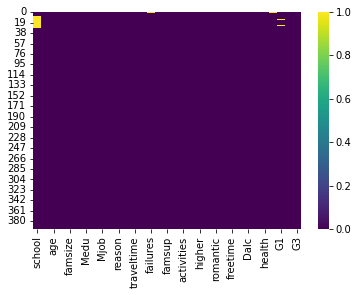

In [ ]:
sns.heatmap(df.isnull(), cmap='viridis')

   
   <h4>Convert "?" to NaN</h4>In the house dataset, missing data comes with the question mark "?".We replace "?" with NaN (Not a Number), which is Python's default missing value marker, for reasons of computational speed and convenience. Here we use the function:  <pre>.replace(A, B, inplace = True) </pre>to replace A by B




In [ ]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,NaN,4,1,1,3,NaN,5.0,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,NaN,3,1,1,3,NaN,5.0,5,6
2,GP,Female,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10.0,7.0,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2.0,15.0,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4.0,6.0,10,10
5,GP,Male,16.0,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10.0,15.0,15,15
6,GP,M,16.0,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0.0,12.0,12,11
7,NaN,NaN,NaN,NaN,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6.0,6.0,5,6
8,NaN,M,15.0,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0.0,16.0,18,19
9,NaN,M,15.0,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0.0,14.0,15,15


<h1 id="deal_missing_values">2. Deal with missing data</h1>
<b>How to deal with missing data?</b>

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data (impute)<br>
        a. replace it by mean or median <br>
        b. replace it by frequency<br>
        c. replace it based on inference or other functions 
    </li>
</ol>

<h3>Drop the whole row</h3>

In [ ]:
df.dropna(subset=['school'], axis=0, inplace=True)

In [ ]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      2
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      2
goout         0
Dalc          0
Walc          0
health        0
absences      2
G1            0
G2            0
G3            0
dtype: int64

<h3>Drop the whole column</h3>

In [ ]:
# TODO: Drop the whole column

<h3> Replace it by mean </h3>

In [ ]:
# TODO: Replace it by mean

<h3>Replace by frequency</h3>

In [ ]:
df['failures']=df['failures'].fillna(df['failures'].value_counts().idxmax())
# After Replacing
df['failures'].isnull().sum()

0

In [ ]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      2
goout         0
Dalc          0
Walc          0
health        0
absences      2
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
df['absences']=df['absences'].fillna(df['absences'].value_counts().idxmax())
# After Replacing
df['absences'].isnull().sum()

0

In [ ]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      2
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
df['freetime']=df['freetime'].fillna(df['absences'].mean())
# After Replacing
df['freetime'].isnull().sum()

0

In [ ]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,5.815013,4,1,1,3,0.0,5.0,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,5.815013,3,1,1,3,0.0,5.0,5,6
2,GP,Female,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10.0,7.0,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2.0,15.0,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4.0,6.0,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20.0,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11.0,9.0,9,9
391,MS,M,17.0,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3.0,14.0,16,16
392,MS,M,21.0,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3.0,10.0,8,7
393,MS,M,18.0,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0.0,11.0,12,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      373 non-null    object 
 1   sex         373 non-null    object 
 2   age         373 non-null    float64
 3   address     373 non-null    object 
 4   famsize     373 non-null    object 
 5   Pstatus     373 non-null    object 
 6   Medu        373 non-null    int64  
 7   Fedu        373 non-null    int64  
 8   Mjob        373 non-null    object 
 9   Fjob        373 non-null    object 
 10  reason      373 non-null    object 
 11  guardian    373 non-null    object 
 12  traveltime  373 non-null    int64  
 13  studytime   373 non-null    int64  
 14  failures    373 non-null    float64
 15  schoolsup   373 non-null    object 
 16  famsup      373 non-null    object 
 17  paid        373 non-null    object 
 18  activities  373 non-null    object 
 19  nursery     373 non-null    o

<h1 id="correct_data_format">3. Correct data format</h1>
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use 
<p><b>.dtype</b> to check the data type</p>
<p><b>.astype</b> to change the data type</p>

In [ ]:
df['age'] = df['age'].astype('int')
df['failures'] = df['failures'].astype('int')
df['G2'] = df['G2'].astype('float')
df['G3'] = df['G3'].astype('float')
df['absences'] = df['absences'].astype('int')
df['freetime'] = df['freetime'].astype('int')

In [ ]:
df['age'].dtype

dtype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      373 non-null    object 
 1   sex         373 non-null    object 
 2   age         373 non-null    int64  
 3   address     373 non-null    object 
 4   famsize     373 non-null    object 
 5   Pstatus     373 non-null    object 
 6   Medu        373 non-null    int64  
 7   Fedu        373 non-null    int64  
 8   Mjob        373 non-null    object 
 9   Fjob        373 non-null    object 
 10  reason      373 non-null    object 
 11  guardian    373 non-null    object 
 12  traveltime  373 non-null    int64  
 13  studytime   373 non-null    int64  
 14  failures    373 non-null    int64  
 15  schoolsup   373 non-null    object 
 16  famsup      373 non-null    object 
 17  paid        373 non-null    object 
 18  activities  373 non-null    object 
 19  nursery     373 non-null    o

<h3>Remove any duplicates</h3>


In [ ]:
df = df.drop_duplicates()

<h3>Data Standardization</h3>
<p>
Data is usually collected from different agencies with different formats.
(Data Standardization is also a term for a particular type of data normalization)
</p>
    
<b>What is Standardization?</b>
<p>Standardization is the process of transforming data into a common format which allows the researcher to make the meaningful comparison.
</p>

In [ ]:
df['sex'].unique()

array(['F', 'Female', 'Male', 'M'], dtype=object)

In [ ]:
df.replace("F", 'Female', inplace = True)
df.replace("M", 'Male', inplace = True)

In [ ]:
df['sex'].unique()

array(['Female', 'Male'], dtype=object)

<h3>Data Normalization </h3>

<b>Why normalization?</b>
<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1
</p>



---

---





##Exploratory Data Analysis (EDA) and Data Visualization


Categorical variables are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.


<h3>Identify Outliers <h3>

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:>

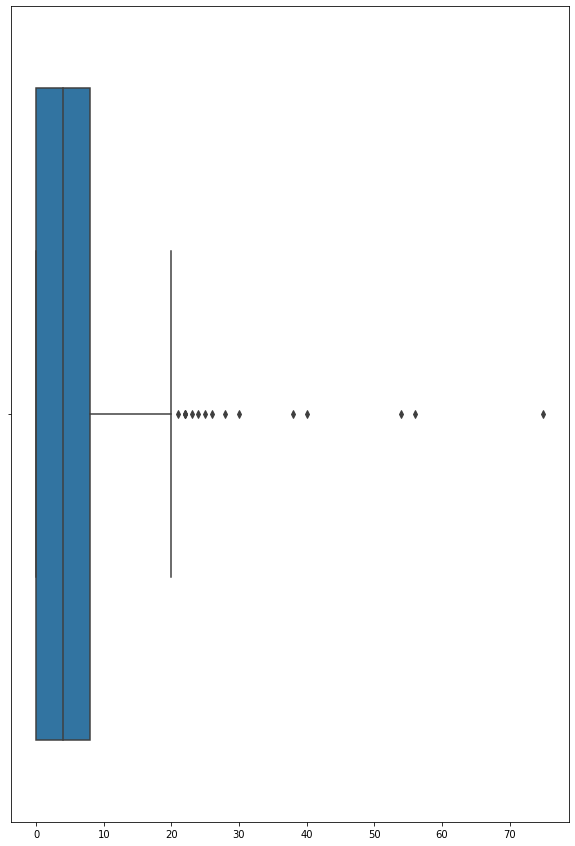

In [ ]:
plt.figure(figsize=(10,15))
sns.boxplot(df['absences'].values, orient='v',)

<h3>Remove Outliers</h3>

In [ ]:
# Remove outliers
df['absences'] = df['absences'].clip(0, 20)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:>

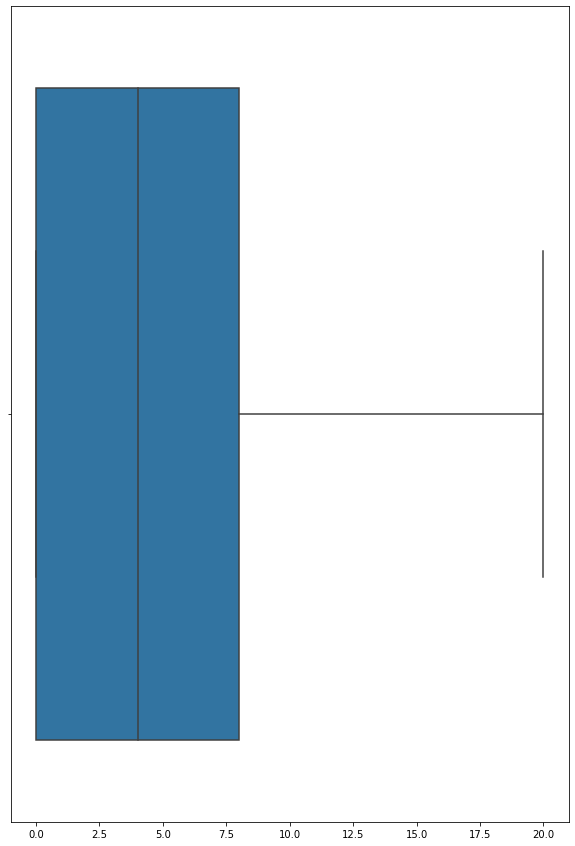

In [ ]:
plt.figure(figsize=(10,15))
sns.boxplot(df['absences'].values, orient='v')

##Discover and Visualize the Data to Gain Insights

<h4>Individual Variables </h4>


In [ ]:
# TODO: Show Individual Variable as graph 

<h4>Relationships Between Variables</h4>

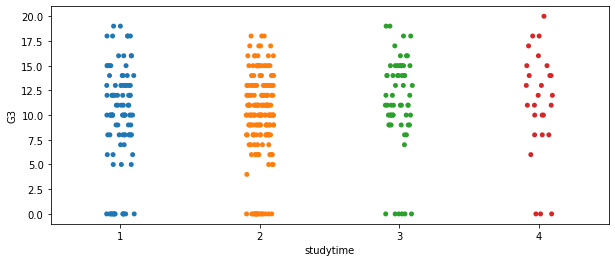

In [ ]:
plt.figure(figsize=(10, 4))
sns.stripplot(x="studytime", y="G3", data=df);

<h4>Weak and Strong Relationships<h4>

<AxesSubplot:xlabel='health', ylabel='G3'>

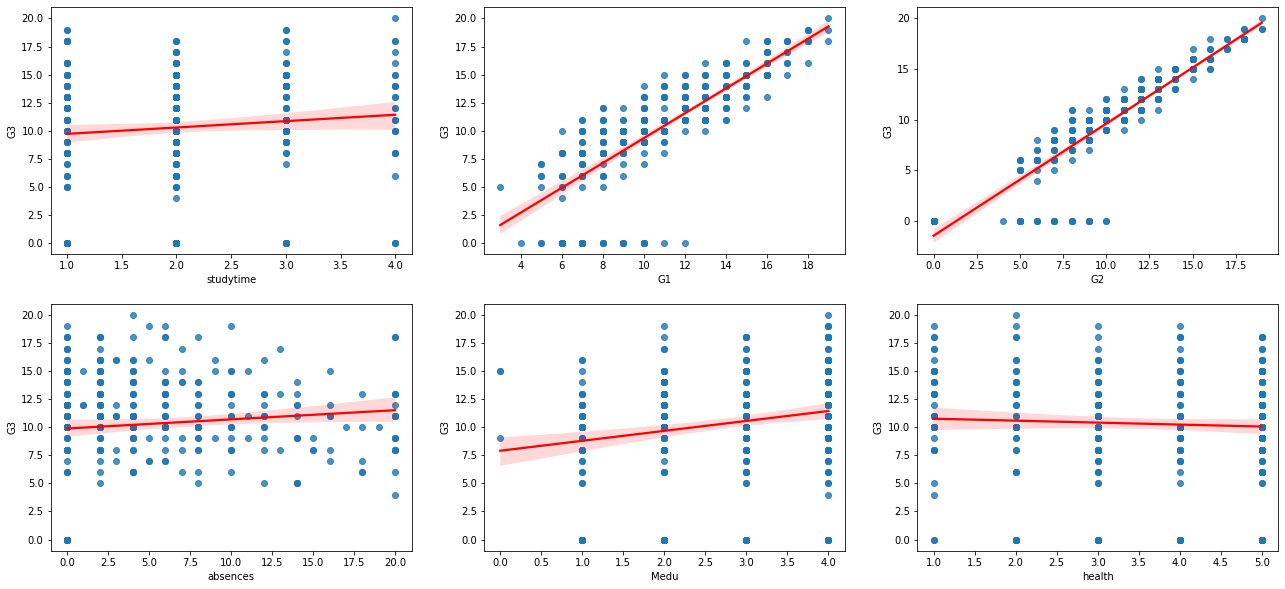

In [ ]:
plt.figure(figsize=(22,10))

plt.subplot(231)#subplot to add a subplot to the current figure
sns.regplot(x='studytime', y='G3', data=df,  line_kws={'color': 'red'}) 

plt.subplot(232)
sns.regplot(x='G1', y='G3', data=df , line_kws={'color': 'red'})
                    
plt.subplot(233)
sns.regplot(x='G2', y='G3', data=df,  line_kws={'color': 'red'})

plt.subplot(234)
sns.regplot(x='absences', y='G3', data=df , line_kws={'color': 'red'})
          
plt.subplot(235)
sns.regplot(x='Medu', y='G3', data=df , line_kws={'color': 'red'})

plt.subplot(236)
sns.regplot(x='health', y='G3', data=df , line_kws={'color': 'red'})
                   

##Looking for Correlations

<h3>Correlation and Causation</h3>

<b> Correlation: </b> a measure of the extent of interdependence between variables.

<b> Causation: </b>the relationship between cause and effect between two variables.

It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler the determining causation as causation may require independent experimentation.

In [ ]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,Female,18,U,GT3,A,4,4,at_home,teacher,...,4,5,4,1,1,3,0,5.0,6.0,6.0
1,GP,Female,17,U,GT3,T,1,1,at_home,other,...,5,5,3,1,1,3,0,5.0,5.0,6.0
2,GP,Female,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7.0,8.0,10.0
3,GP,Female,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15.0,14.0,15.0
4,GP,Female,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,Male,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9.0,9.0,9.0
391,MS,Male,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14.0,16.0,16.0
392,MS,Male,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10.0,8.0,7.0
393,MS,Male,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11.0,12.0,10.0


<AxesSubplot:>

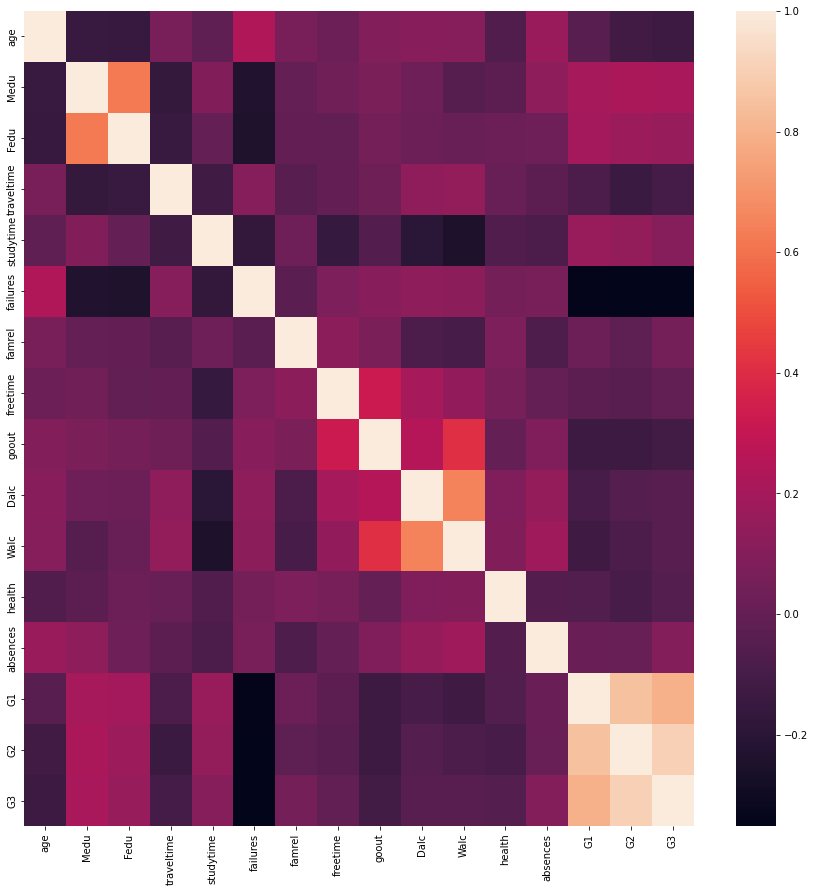

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())

#Feature  Engineering

* Construct new features
* Combine two features or uncombine a feature
*	Select features

<h3>Conclusion: Important Variables</h3>
We now have a better idea of what our data looks like and which variables are important to take into account when predicting the house price. 

##Select features

In [ ]:
print('max G3 : ', df['G3'].max())
print('min G3 : ', df['G3'].min())
print('mean G3 :',df['G3'].mean())

max G3 :  20.0
min G3 :  0.0
mean G3 : 10.316353887399464


In [ ]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
selected_features = ['G1', 'G2', 'G3','studytime', 'Medu',]
df_final = df[selected_features]
df_final

,G1,G2,G3,studytime,Medu
0,5.0,6.0,6.0,2,4
1,5.0,5.0,6.0,2,1
2,7.0,8.0,10.0,2,1
3,15.0,14.0,15.0,3,4
4,6.0,10.0,10.0,2,3
...,...,...,...,...,...
390,9.0,9.0,9.0,2,2
391,14.0,16.0,16.0,1,3
392,10.0,8.0,7.0,1,1
393,11.0,12.0,10.0,1,3


<h3>Save Cleaned Data and Download it <h3>

#Choose and  fit model
We will continue tomorrow ...





---



---



---



---



##Choose the algorithm that you think it is the right

In [ ]:
# TODO: Choose the algorithm that you think it is the right and import its libraries

## create your model

1. **Input data**

In [ ]:
columns = ['G1', 'G2','studytime', 'Medu']
labels = df_final['G3'].values
features = df_final[list(columns)].values

In [ ]:
features

array([[ 5.,  6.,  2.,  4.],
       [ 5.,  5.,  2.,  1.],
       [ 7.,  8.,  2.,  1.],
       ...,
       [10.,  8.,  1.,  1.],
       [11., 12.,  1.,  3.],
       [ 8.,  9.,  1.,  1.]])

In [ ]:
labels

array([ 6.,  6., 10., 15., 10., 15., 11., 11., 12., 17., 16., 12., 15.,
        6., 18., 15., 11., 13., 11., 12., 18., 11.,  9.,  6., 11., 20.,
       14.,  7., 13., 13., 10., 11., 13., 10., 15., 15.,  9., 16., 11.,
       11.,  9.,  9., 10., 15., 12.,  6.,  8., 16., 15., 10.,  5., 14.,
       11., 10., 10., 11., 10.,  5., 12., 11.,  6., 15., 10.,  8.,  6.,
       14., 10.,  7.,  8., 18.,  6., 10., 14., 10., 15., 10., 14.,  8.,
        5., 17., 14.,  6., 18., 11.,  8., 18., 13., 16., 19., 10., 13.,
       19.,  9., 16., 14., 13.,  8., 13., 15., 15., 13., 13.,  8., 12.,
       11.,  9.,  0., 18.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0., 12.,
       15.,  0.,  9., 11., 13.,  0., 11.,  0., 11.,  0., 10.,  0., 14.,
       10.,  0., 12.,  8., 13., 10., 15., 12.,  0.,  7.,  0., 10.,  7.,
       12., 10., 16.,  0., 14.,  0., 16., 10.,  0.,  9.,  9., 11.,  6.,
        9., 11.,  8., 12., 17.,  8., 12., 11., 11., 15.,  9., 10., 13.,
        9.,  8., 10., 14., 15., 16., 10., 18., 10., 16., 10., 10

2. **Spilt data**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)

   3. **Bulid a Model**

In [ ]:
from sklearn import linear_model

# Bulid a new Model
regression = linear_model.LinearRegression()

# Train the Model
regression.fit(X_train, y_train)

LinearRegression()

   4. **Predict**

In [ ]:
# Predict for training set
y_train_predict = regression.predict(X_train)

# Predict for training set
y_test_predict = regression.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error , mean_absolute_error


# # model evaluation for training set
mse_train = mean_squared_error(y_train, y_train_predict)
mae_train = mean_absolute_error(y_train, y_train_predict)
print("The model performance for training set")
print('RMSE is {}'.format(np.sqrt(mse_train)))
print('MAE is {}'.format(mae_train))
print("---------------------------------------")

# model evaluation for testing set
mse_test = mean_squared_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
mae_test = mean_absolute_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
print("The model performance for testing set")
print('RMSE is {}'.format(np.sqrt(mse_test)))
print('MAE is {}'.format(mae_test))

print("---------------------------------------")
test_score= regression.score(X_test, y_test)# Return R2 score . The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse) 
print("The score of model for testing set")
print('Test score {}'.format(test_score.round(2)))


The model performance for training set
RMSE is 1.986214997391038
MAE is 1.2525823907307778
---------------------------------------
The model performance for testing set
RMSE is 1.9342445067695146
MAE is 1.1433248846933093
---------------------------------------
The score of model for testing set
Test score 0.81


In [ ]:
compare={"Actual": y_test, "Predict": y_test_predict}
pd.DataFrame(compare)

,Actual,Predict
0,13.0,11.984112
1,12.0,12.701859
2,15.0,16.159035
3,14.0,14.300267
4,13.0,12.074993
...,...,...
107,11.0,11.197194
108,6.0,4.870883
109,0.0,7.067712
110,12.0,9.219100


##Evaluate your model  performance

In [ ]:
# TODO:

## Visualize the Result

In [ ]:
idx= np.random.choice(X_test.shape[0])
print ("Predicted price :", y_test_predict[idx])
print ("Actual price :", y_test[idx])

Predicted price : 12.44149814899558
Actual price : 12.0


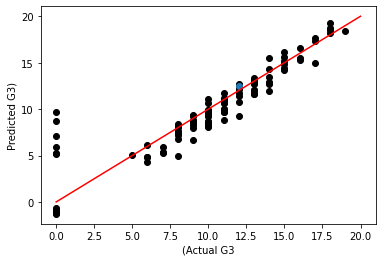

In [ ]:
# visualization
plt.scatter(y_test, y_test_predict,  color='black')
plt.scatter(y_test[idx], y_test_predict[idx])
plt.xlabel('(Actual G3')
plt.ylabel('Predicted G3)')
plt.plot([df_final['G3'].min(), df_final['G3'].max()], [df_final['G3'].min(), df_final['G3'].max()], color='red')
plt.show()

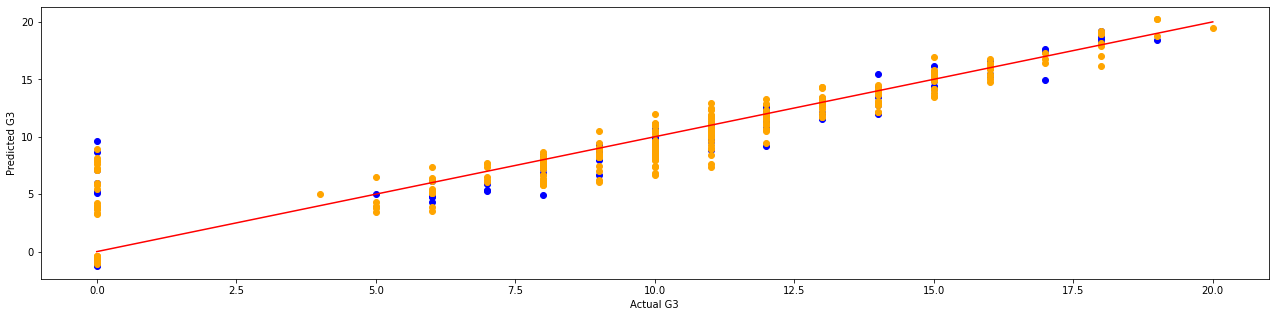

In [ ]:
plt.figure(figsize=(22,5))
plt.scatter(y_test, y_test_predict,  color='blue')
plt.scatter(y_train, y_train_predict,  color='Orange')
plt.plot([df_final['G3'].min(), df_final['G3'].max()], [df_final['G3'].min(), df_final['G3'].max()], color='red')
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.show() 